# Import dependencies

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

In [408]:
chemin_csv='../../Data/full.csv'

p = 0.01 # 1% of the lines

# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped

df=pd.read_csv(chemin_csv,header=0,skiprows=lambda i: i>0 and random.random() > p,index_col=0,low_memory=False)

# Data exploration 

In [409]:
df.shape

(25338, 39)

In [410]:
df.dtypes

date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                   float64
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                     float64
lot2_surface_carrez             float64
lot3_numero                     float64
lot3_surface_carrez             float64
lot4_numero                     float64
lot4_surface_carrez             float64


In [411]:
df.head()

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
id_mutation,,,,,,,,,,,,,,,,,,,,,
2019-19,2019-01-07,1,Vente,583000.0,51.0,NaN,RUE CHAUDOUET,0067,1960.0,01289,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,1002.0,5.209590,46.190458
2019-45,2019-01-07,1,Vente,153000.0,NaN,NaN,PISTOLET EST,B227,1570.0,01159,...,NaN,NaN,NaN,T,terres,NaN,NaN,1016.0,4.878587,46.339157
2019-67,2019-01-11,1,Vente,37563.0,NaN,NaN,A L ETANG,B032,1340.0,01196,...,NaN,NaN,NaN,T,terres,NaN,NaN,820.0,5.120746,46.358886
2019-94,2019-01-14,1,Vente,162600.0,1.0,NaN,LOT LES BONNOTS,A010,1190.0,01337,...,Maison,90.0,4.0,S,sols,NaN,NaN,762.0,4.948528,46.449186
2019-97,2019-01-17,1,Vente,8000.0,NaN,NaN,AU CHAMP ROMAN,B034,1250.0,01447,...,NaN,NaN,NaN,P,prés,NaN,NaN,3989.0,5.397334,46.203175


In [412]:
#missing data
def miss_values(data) :
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

miss_values(df)

,Total,Percent
ancien_id_parcelle,25333,0.999803
lot5_surface_carrez,25329,0.999645
lot4_surface_carrez,25321,0.999329
lot5_numero,25300,0.998500
lot3_surface_carrez,25293,0.998224
ancien_nom_commune,25290,0.998106
ancien_code_commune,25290,0.998106
numero_volume,25267,0.997198
lot4_numero,25251,0.996566
lot3_numero,25076,0.989660


# Preprossesing 

In [413]:
 #drop features with to 60% null values 
df=df[df.columns[df.isnull().mean() < 0.5]]
df.dtypes

date_mutation                 object
numero_disposition             int64
nature_mutation               object
valeur_fonciere              float64
adresse_numero               float64
adresse_nom_voie              object
adresse_code_voie             object
code_postal                  float64
code_commune                  object
nom_commune                   object
code_departement              object
id_parcelle                   object
nombre_lots                    int64
code_type_local              float64
type_local                    object
nombre_pieces_principales    float64
code_nature_culture           object
nature_culture                object
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

In [414]:
#drop colum with same signification (code/signification) 
column_to_drop=['type_local','nature_culture','nom_commune']
df.drop(column_to_drop, axis=1, inplace=True)

#drop colum adress, w'll be working with longitude/latitude 
column_to_drop=['adresse_numero','adresse_nom_voie','adresse_code_voie']
df.drop(column_to_drop, axis=1, inplace=True)

#drop colum not useful for our context
column_to_drop=['id_parcelle','date_mutation','numero_disposition']
df.drop(column_to_drop, axis=1, inplace=True)

#drop rows where 'valeur_fonciere' is NaN
df = df.dropna(axis=0, subset=['valeur_fonciere'])

df.dtypes

nature_mutation               object
valeur_fonciere              float64
code_postal                  float64
code_commune                  object
code_departement              object
nombre_lots                    int64
code_type_local              float64
nombre_pieces_principales    float64
code_nature_culture           object
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

In [415]:
miss_values(df)

,Total,Percent
nombre_pieces_principales,11588,0.463001
code_type_local,11573,0.462402
surface_terrain,7863,0.314168
code_nature_culture,7863,0.314168
latitude,515,0.020577
longitude,515,0.020577
code_postal,282,0.011267
nombre_lots,0,0.000000
code_departement,0,0.000000
code_commune,0,0.000000


In [416]:
df.head()

,nature_mutation,valeur_fonciere,code_postal,code_commune,code_departement,nombre_lots,code_type_local,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude
id_mutation,,,,,,,,,,,,
2019-19,Vente,583000.0,1960.0,01289,01,0,3.0,0.0,S,1002.0,5.209590,46.190458
2019-45,Vente,153000.0,1570.0,01159,01,0,NaN,NaN,T,1016.0,4.878587,46.339157
2019-67,Vente,37563.0,1340.0,01196,01,0,NaN,NaN,T,820.0,5.120746,46.358886
2019-94,Vente,162600.0,1190.0,01337,01,0,1.0,4.0,S,762.0,4.948528,46.449186
2019-97,Vente,8000.0,1250.0,01447,01,0,NaN,NaN,P,3989.0,5.397334,46.203175


# Analyse data

In [417]:
df.describe()

,valeur_fonciere,code_postal,nombre_lots,code_type_local,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.502800e+04,24746.000000,25028.000000,13455.000000,13440.000000,17165.000000,24513.000000,24513.000000
mean,9.957509e+05,51949.645195,0.390802,1.969825,2.474405,3108.409787,1.849943,46.739934
std,6.863795e+06,27309.820730,0.684804,0.946689,2.076647,11099.704148,4.608087,3.893569
min,1.000000e+00,1000.000000,0.000000,1.000000,0.000000,1.000000,-63.092922,-21.377486
25%,6.000000e+04,31220.000000,0.000000,1.000000,0.000000,236.000000,0.064680,45.083830
50%,1.500000e+05,50160.000000,0.000000,2.000000,3.000000,602.000000,2.233500,47.334108
75%,2.710000e+05,77144.000000,1.000000,3.000000,4.000000,1896.000000,3.516740,48.802010
max,2.453659e+08,97480.000000,15.000000,4.000000,12.000000,574527.000000,55.690097,51.081085


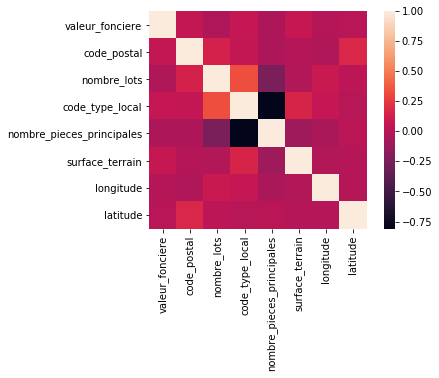

In [418]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True);

In [419]:
#drop nombre_pieces_principales cause of the big correlation with  code_type_local 
column_to_drop=['nombre_pieces_principales']
df.drop(column_to_drop, axis=1, inplace=True)

In [420]:
y=df['valeur_fonciere']
X=df.drop('valeur_fonciere', axis=1)


 mu = 995750.89 and sigma = 6863657.93



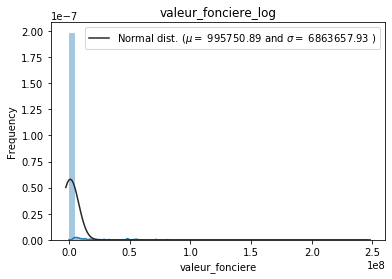

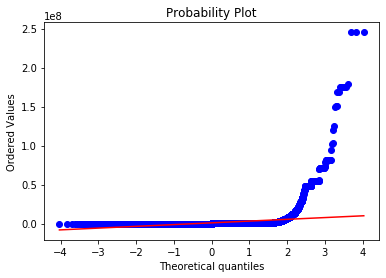

Skewness: 16.596521
Kurtosis: 393.437567


In [421]:
# Plot Histogram
sns.distplot(y, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('valeur_fonciere_log')

fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

# Fill missing values

In [422]:
miss_values(df)

,Total,Percent
code_type_local,11573,0.462402
surface_terrain,7863,0.314168
code_nature_culture,7863,0.314168
latitude,515,0.020577
longitude,515,0.020577
code_postal,282,0.011267
nombre_lots,0,0.000000
code_departement,0,0.000000
code_commune,0,0.000000
valeur_fonciere,0,0.000000


In [423]:
df["code_nature_culture"] = df["code_nature_culture"].fillna("None")

for col in ('code_postal','longitude','latitude','surface_terrain','code_type_local'):
    df[col] = df.groupby("code_departement")[col].transform(lambda x: x.fillna(x.median()))


In [424]:
#drop rows where 'code_type_local' is NaN
df = df.dropna(axis=0, subset=['code_type_local'])
miss_values(df)

,Total,Percent
latitude,0,0.0
longitude,0,0.0
surface_terrain,0,0.0
code_nature_culture,0,0.0
code_type_local,0,0.0
nombre_lots,0,0.0
code_departement,0,0.0
code_commune,0,0.0
code_postal,0,0.0
valeur_fonciere,0,0.0


# Transformation 

In [425]:
df.dtypes

nature_mutation         object
valeur_fonciere        float64
code_postal            float64
code_commune            object
code_departement        object
nombre_lots              int64
code_type_local        float64
code_nature_culture     object
surface_terrain        float64
longitude              float64
latitude               float64
dtype: object

In [426]:
df["code_postal"]=df["code_postal"].apply(str)
df["code_type_local"]=df["code_type_local"].apply(str)

In [427]:
df.dtypes

nature_mutation         object
valeur_fonciere        float64
code_postal             object
code_commune            object
code_departement        object
nombre_lots              int64
code_type_local         object
code_nature_culture     object
surface_terrain        float64
longitude              float64
latitude               float64
dtype: object


 mu = 11.60 and sigma = 2.05



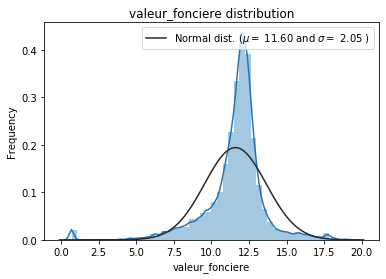

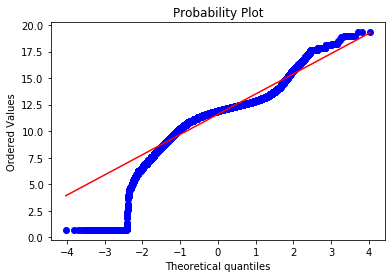

Skewness: -1.423308
Kurtosis: 6.919855


In [428]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["valeur_fonciere"] = np.log1p(df["valeur_fonciere"])
                                
#Check the new distribution 
sns.distplot(df["valeur_fonciere"] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["valeur_fonciere"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('valeur_fonciere distribution')

fig = plt.figure()
res = stats.probplot(df["valeur_fonciere"], plot=plt)
plt.show()

y_train = df.valeur_fonciere.values

print("Skewness: %f" % df["valeur_fonciere"].skew())
print("Kurtosis: %f" % df["valeur_fonciere"].kurt())

In [429]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
surface_terrain,20.012597
nombre_lots,2.891990
valeur_fonciere,-1.423222
longitude,-4.266904
latitude,-10.140638


In [430]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)
    df[feat] += 1

There are 5 skewed numerical features to Box Cox transform


In [431]:
miss_values(df)

,Total,Percent
longitude,3779,0.150991
latitude,37,0.001478
surface_terrain,0,0.000000
code_nature_culture,0,0.000000
code_type_local,0,0.000000
nombre_lots,0,0.000000
code_departement,0,0.000000
code_commune,0,0.000000
code_postal,0,0.000000
valeur_fonciere,0,0.000000


In [432]:
#drop rows where 'longitude' is NaN
df = df.dropna(axis=0, subset=['longitude'])

#drop rows where 'latitude' is NaN
df = df.dropna(axis=0, subset=['latitude'])

In [433]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
surface_terrain,1.349403
nombre_lots,1.258323
latitude,-0.243364
longitude,-1.348334
valeur_fonciere,-4.279536


In [434]:
df = pd.get_dummies(df)
print(df.shape)

(21212, 12733)


In [435]:
df.head()

,valeur_fonciere,nombre_lots,surface_terrain,longitude,latitude,nature_mutation_Adjudication,nature_mutation_Echange,nature_mutation_Expropriation,nature_mutation_Vente,nature_mutation_Vente en l'état futur d'achèvement,...,code_nature_culture_None,code_nature_culture_P,code_nature_culture_PA,code_nature_culture_PC,code_nature_culture_PH,code_nature_culture_PP,code_nature_culture_S,code_nature_culture_T,code_nature_culture_VE,code_nature_culture_VI
id_mutation,,,,,,,,,,,,,,,,,,,,,
2019-19,4.266769,1.0,13.130997,3.100680,6.217996,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2019-45,4.121240,1.0,13.170123,3.028936,6.223606,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2019-67,3.953988,1.0,12.574819,3.081749,6.224349,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2019-94,4.128132,1.0,12.375447,3.044377,6.227747,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2019-97,3.748458,1.0,17.456892,3.139940,6.218477,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


# Modeling and Predictions

In [436]:
y=df['valeur_fonciere']
X=df.drop('valeur_fonciere', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [437]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



In [438]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [439]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [440]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.2895 (0.0194)

ElasticNet score: 0.2893 (0.0194)

Kernel Ridge score: 0.3004 (0.0184)

Gradient Boosting score: 0.2892 (0.0202)



In [441]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [442]:
ENet.fit(X_train, y_train)
train_pred = ENet.predict(X_train)
pred = ENet.predict(X_test.values)
print(rmsle(y_test, pred))

0.30400391820975503
